# Imports

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:

from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
from keras.layers.convolutional import Conv2D

In [4]:

from keras.utils import np_utils # encoding
import matplotlib.pyplot as plt #plotting

# 60k images with 32x32 dimensions each and 3 channels (r,g,b)

IMAGE_CHANNELS = 3
IMAGE_ROWS = 32
IMAGE_COLUMNS = 32

#CONSTANTS

BATCH_SIZE = 128
VALIDATION_SPLIT = .2
VERBOSE = 1
CLASSES = 2
EPOCHS = 100

OPTIM = optimizers.Adam(learning_rate=0.01) # learning rate to be defined

# Downloading the Data

In [5]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


# Data Preprocessing

Normalizing

In [6]:

X_train = X_train/255 # normalize
X_test = X_test/255

Reshaping train and test sets

In [7]:
X_train.reshape((50000,32,32,3)).astype('float32')
X_test.reshape((10000, 32,32,3)).astype('float32')

samples , height, width, channel = X_train.shape


Binary Encoding

In [8]:
y_prac_train=np.where(np.isin(y_train, [[0],[1],[8],[9]]),0,1) # 0 where label is vehicle
print(np.unique(y_prac_train))

y_prac_test=np.where(np.isin(y_test, [[0],[1],[8],[9]]),0,1)
np.unique(y_prac_test)

[0 1]


array([0, 1])

In [9]:
X_train.shape
y_train.shape

(50000, 1)

Encoder to one hot

In [10]:
y_train = np_utils.to_categorical(y_prac_train,2)
y_test = np_utils.to_categorical(y_prac_test,2)

y_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

reshaping for shallow algorithms

In [11]:
X_train_reshaped_for_shallow= X_train.reshape(X_train.shape[0],3072)
X_test_reshaped_for_shallow = X_test.reshape(X_test.shape[0],3072) # since knn needs 2 dims.. we change the dimensions to (50000, 32x32x3=)

visualizing a random images

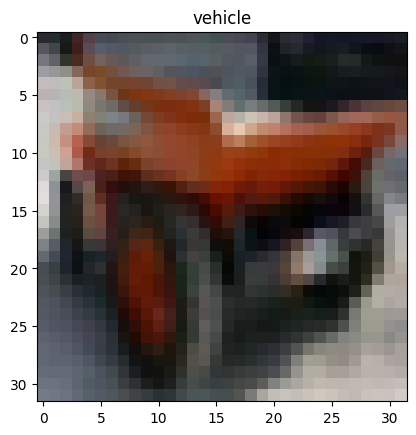

In [12]:
a = np.random.choice(range(len(X_train)))

classes = {0: 'animal', 1:'vehicle'} # dictionary mapping two classes..

plt.title(classes[y_train[a][0]])
plt.imshow(X_train[a], interpolation='none')

In [13]:
def build_m1(input_shape=(32,32,3), classes=2, learning_rate=.001):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (4,4), activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Dropout(.25))

  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(classes, activation='softmax'))

  model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

  return model

def build_m2(input_shape=(32,32,3), classes=2, learning_rate=.001):
  model = models.Sequential()
  model.add(layers.Conv2D(128, (5,5), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Dropout(.25))

  model.add(layers.Conv2D(64, (2,2), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (2,2), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (2,2), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Dropout(.25))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(classes, activation='softmax'))

  model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

  return model


In [14]:
model_1 = build_m1() # as it is
model_2 = build_m1(learning_rate=.0001) #
model_3 = build_m1(learning_rate=.00001)

model_4 = build_m2() # as it is
model_5 = build_m2(learning_rate=.0001) #
model_6 = build_m2(learning_rate=.00001)


In [ ]:
# model_1.fit()

In [ ]:
  # model_1 = models.Sequential()
  # model_1.add(layers.Conv2D(128, (5,5), activation='relu', input_shape=(32,32,3)))
  # model_1.add(layers.MaxPooling2D(pool_size=(2,2)))

  # model_1.add(layers.Conv2D(128, (3,3), activation='relu'))
  # model_1.add(layers.MaxPooling2D(pool_size=(2,2)))

  # model_1.add(layers.Dropout(.25))

  # model_1.add(layers.Conv2D(64, (2,2), activation='relu'))
  # model_1.add(layers.BatchNormalization())
  # model_1.add(layers.Conv2D(64, (2,2), activation='relu'))
  # model_1.add(layers.BatchNormalization())
  # model_1.add(layers.Conv2D(64, (2,2), activation='relu'))
  # model_1.add(layers.MaxPooling2D(pool_size=(2,2)))

  # model_1.add(layers.Dropout(.25))

  # model_1.add(layers.Flatten())
  # model_1.add(layers.Dense(512, activation='relu'))
  # model_1.add(layers.Dense(2, activation='softmax'))

In [15]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [ ]:
# model = build((32,32,3),10)

In [ ]:
# model_1.compile(loss='binary_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [16]:
hist_1 = model_1.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)
hist_2 = model_2.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2) # to be replaces by constant set abve
hist_3 = model_3.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)


Epoch 1/10
313/313 [==============================] - 14s 9ms/step - loss: 0.3284 - accuracy: 0.8591 - val_loss: 0.2669 - val_accuracy: 0.8969
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 0.2526 - accuracy: 0.8978 - val_loss: 0.2432 - val_accuracy: 0.9055
Epoch 3/10
313/313 [==============================] - 2s 8ms/step - loss: 0.2360 - accuracy: 0.9046 - val_loss: 0.2249 - val_accuracy: 0.9108
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 0.2196 - accuracy: 0.9123 - val_loss: 0.2167 - val_accuracy: 0.9111
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 0.2100 - accuracy: 0.9157 - val_loss: 0.1999 - val_accuracy: 0.9220
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 0.2004 - accuracy: 0.9202 - val_loss: 0.2202 - val_accuracy: 0.9115
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.1872 - accuracy: 0.9255 - val_loss: 0.2022 - val_accuracy: 0.9216
Epoch

In [17]:
hist_4 = model_4.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)
hist_5 = model_5.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2) # to be replaces by constant set abve
hist_6 = model_6.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)

Epoch 1/10
313/313 [==============================] - 10s 18ms/step - loss: 0.3313 - accuracy: 0.8595 - val_loss: 0.3195 - val_accuracy: 0.8605
Epoch 2/10
313/313 [==============================] - 4s 14ms/step - loss: 0.2657 - accuracy: 0.8931 - val_loss: 0.3518 - val_accuracy: 0.8581
Epoch 3/10
313/313 [==============================] - 4s 14ms/step - loss: 0.2446 - accuracy: 0.9014 - val_loss: 0.2879 - val_accuracy: 0.8713
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 0.2347 - accuracy: 0.9065 - val_loss: 0.4335 - val_accuracy: 0.7986
Epoch 5/10
313/313 [==============================] - 4s 14ms/step - loss: 0.2212 - accuracy: 0.9102 - val_loss: 0.2248 - val_accuracy: 0.9107
Epoch 6/10
313/313 [==============================] - 5s 15ms/step - loss: 0.2100 - accuracy: 0.9157 - val_loss: 0.2145 - val_accuracy: 0.9150
Epoch 7/10
313/313 [==============================] - 5s 15ms/step - loss: 0.2005 - accuracy: 0.9204 - val_loss: 0.2228 - val_accuracy: 0.915

plotting accuracy

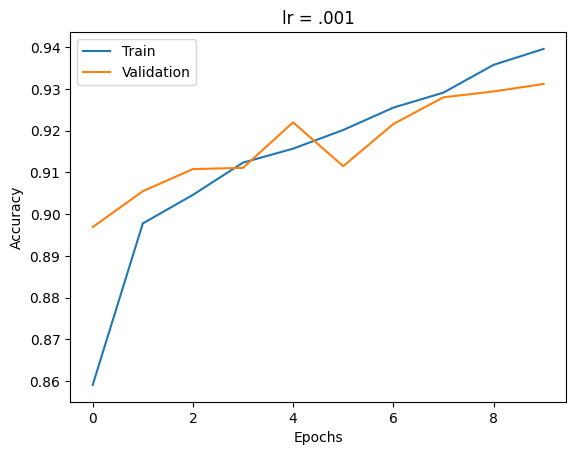

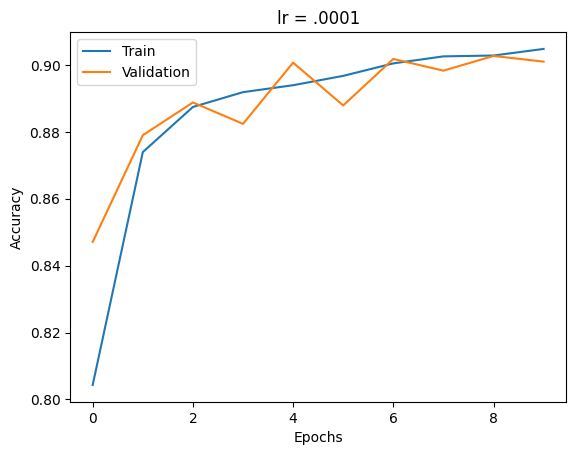

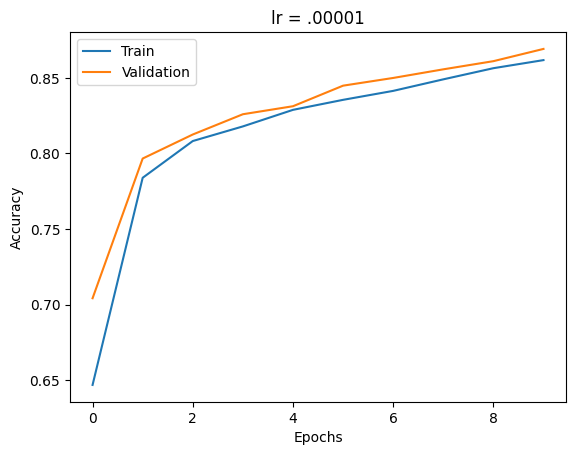

In [18]:
plt.plot(hist_1.history['accuracy'])
plt.plot(hist_1.history['val_accuracy'])
plt.title("lr = .001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title("lr = .0001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title("lr = .00001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()


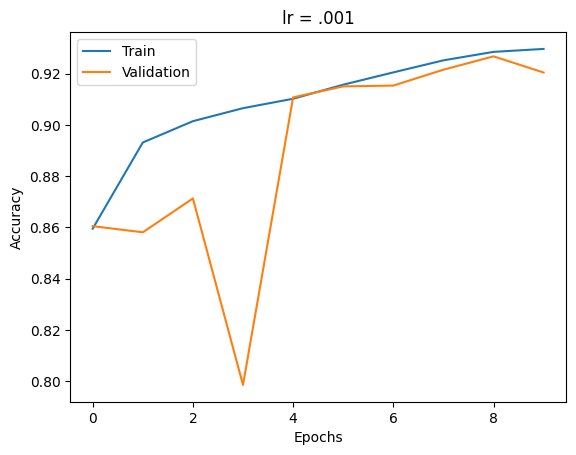

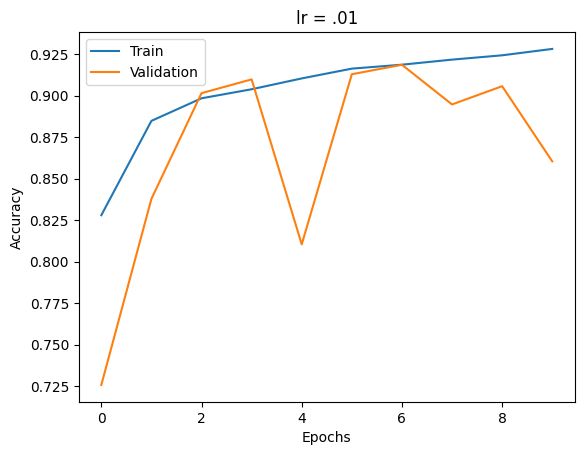

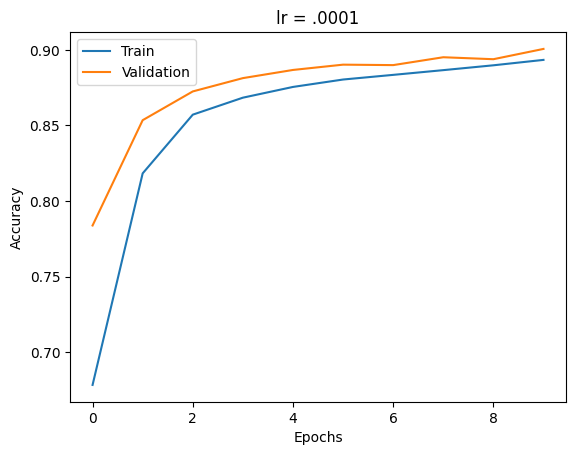

In [19]:
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title("lr = .001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_5.history['accuracy'])
plt.plot(hist_5.history['val_accuracy'])
plt.title("lr = .01")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_6.history['accuracy'])
plt.plot(hist_6.history['val_accuracy'])
plt.title("lr = .0001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plotting loss

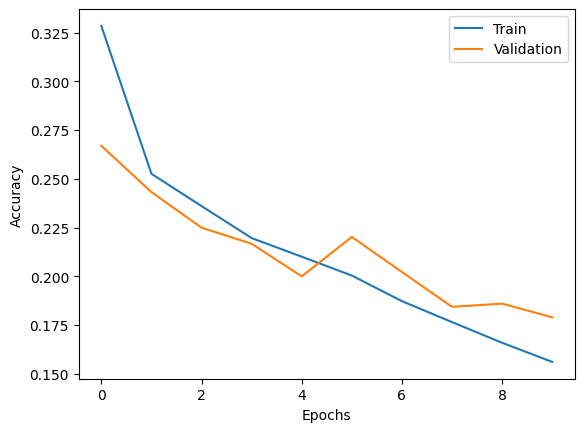

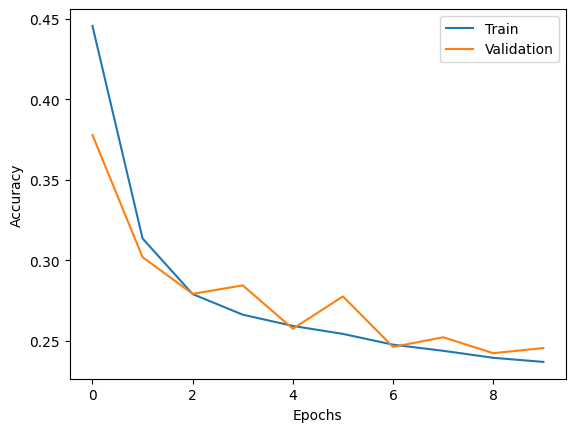

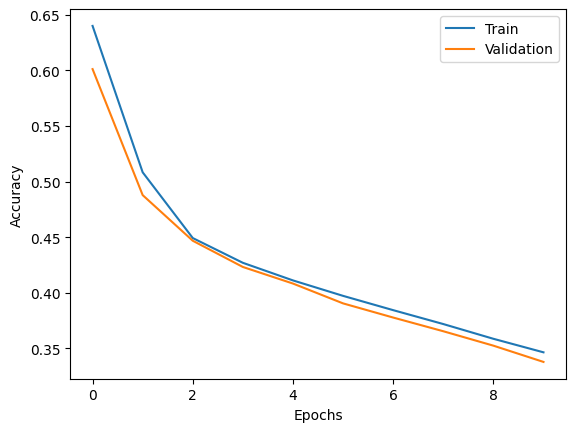

In [20]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()


plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

In [27]:
metrics_1=model_1.evaluate(X_test,y_test)

print("Accuracy: ", metrics_1[1]*100)
print("Loss: ", metrics_1[0]*100)

y_hat_1=model_1.predict(X_test)


metrics_2=model_2.evaluate(X_test,y_test)

print("Accuracy: ", metrics_2[1]*100)
print("Loss: ", metrics_2[0]*100)

y_hat_2=model_2.predict(X_test)



metrics_3=model_3.evaluate(X_test,y_test)

print("Accuracy: ", metrics_3[1]*100)
print("Loss: ", metrics_3[0]*100)

y_hat_3=model_3.predict(X_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1722 - accuracy: 0.9309
Accuracy:  93.0899977684021
Loss:  17.215295135974884
313/313 [==============================] - 1s 3ms/step - loss: 0.2393 - accuracy: 0.9051
Accuracy:  90.50999879837036
Loss:  23.928458988666534
313/313 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8681
Accuracy:  86.80999875068665
Loss:  33.39054882526398
313/313 [==============================] - 1s 2ms/step


In [79]:
from sklearn import metrics

In [29]:
metrics_4=model_4.evaluate(X_test,y_test)

print("Accuracy: ", metrics_4[1]*100)
print("Loss: ", metrics_4[0]*100)

y_hat_4=model_4.predict(X_test)



metrics_5=model_5.evaluate(X_test,y_test)

print("Accuracy: ", metrics_5[1]*100)
print("Loss: ", metrics_5[0]*100)

y_hat_5=model_5.predict(X_test)



metrics_6=model_6.evaluate(X_test,y_test)

print("Accuracy: ", metrics_6[1]*100)
print("Loss: ", metrics_6[0]*100)

y_hat_6=model_6.predict(X_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2027 - accuracy: 0.9208
Accuracy:  92.0799970626831
Loss:  20.26570737361908
313/313 [==============================] - 1s 4ms/step - loss: 0.3468 - accuracy: 0.8594
Accuracy:  85.93999743461609
Loss:  34.680891036987305
313/313 [==============================] - 1s 4ms/step - loss: 0.2411 - accuracy: 0.9021
Accuracy:  90.21000266075134
Loss:  24.109254777431488
313/313 [==============================] - 1s 2ms/step


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_temp_1 = np.argmax(y_test, axis=1)
y_hat_temp_1 = np.argmax(y_hat_1, axis=1)
cm_1 = confusion_matrix(y_test_temp_1,y_hat_temp_1)
print(cm_1)
print("---------------------------")

y_test_temp_2 = np.argmax(y_test, axis=1)
y_hat_temp_2 = np.argmax(y_hat_2, axis=1)
cm_2 = confusion_matrix(y_test_temp_2,y_hat_temp_2)
print(cm_2)

print("---------------------------")
y_test_temp_3 = np.argmax(y_test, axis=1)
y_hat_temp_3 = np.argmax(y_hat_3, axis=1)
cm_3 = confusion_matrix(y_test_temp_3,y_hat_temp_3)
print(cm_3)

y_test_temp_4 = np.argmax(y_test, axis=1)
y_hat_temp_4 = np.argmax(y_hat_4, axis=1)
cm_4 = confusion_matrix(y_test_temp_4,y_hat_temp_4)
print(cm_4)
print("---------------------------")

y_test_temp_5 = np.argmax(y_test, axis=1)
y_hat_temp_5 = np.argmax(y_hat_5, axis=1)
cm_5 = confusion_matrix(y_test_temp_5,y_hat_temp_5)
print(cm_5)

print("---------------------------")
y_test_temp_6 = np.argmax(y_test, axis=1)
y_hat_temp_6 = np.argmax(y_hat_6, axis=1)
cm_6 = confusion_matrix(y_test_temp_6,y_hat_temp_6)
print(cm_6)

[[3605  395]
 [ 296 5704]]
---------------------------
[[3662  338]
 [ 611 5389]]
---------------------------
[[3179  821]
 [ 498 5502]]
[[3451  549]
 [ 243 5757]]
---------------------------
[[3914   86]
 [1320 4680]]
---------------------------
[[3466  534]
 [ 445 5555]]


---------------------------
	Performance Metrics 

---------------------------
The accuracy is 90.51%
Precision:  0.9409813165706303
Recall score:  0.8981666666666667
F1 score:  0.9190756374179244
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3662
	True Negatives: 338
	False Positives: 5389
	False Negatives: 611



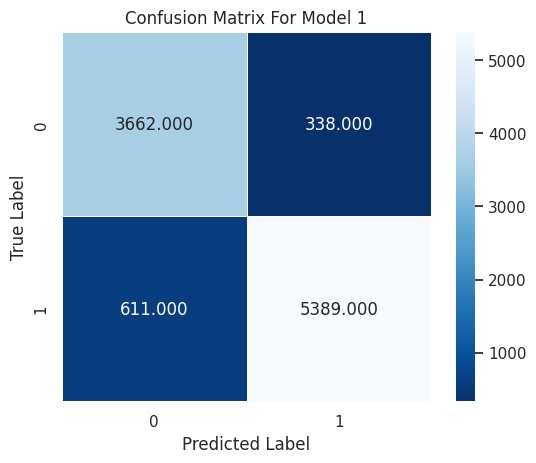

In [104]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_1,y_hat_temp_1)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_1,y_hat_temp_1))
print('Recall score: ',metrics.recall_score(y_test_temp_1,y_hat_temp_1))
print('F1 score: ',metrics.f1_score(y_test_temp_1,y_hat_temp_1))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")
cm_1 = confusion_matrix(y_test_temp_1,y_hat_temp_1)
sns.heatmap(cm_1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_1[0,0])
print("\tTrue Negatives:",cm_1[0,1])
print("\tFalse Positives:",cm_1[1,1])
print("\tFalse Negatives:",cm_1[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 1")
plt.show()
# print("\tConfusion Matrix: \n")

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 90.51%
Precision:  0.9409813165706303
Recall score:  0.8981666666666667
F1 score:  0.9190756374179244
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3662
	True Negatives: 338
	False Positives: 5389
	False Negatives: 611



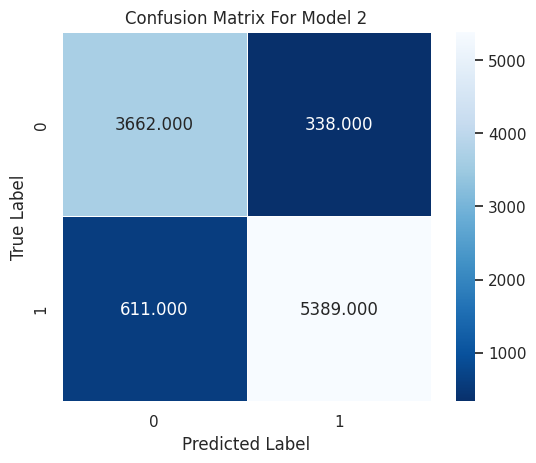

In [105]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_2,y_hat_temp_2)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_2,y_hat_temp_2))
print('Recall score: ',metrics.recall_score(y_test_temp_2,y_hat_temp_2))
print('F1 score: ',metrics.f1_score(y_test_temp_2,y_hat_temp_2))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")
cm_2 = confusion_matrix(y_test_temp_2,y_hat_temp_2)
sns.heatmap(cm_2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_2[0,0])
print("\tTrue Negatives:",cm_2[0,1])
print("\tFalse Positives:",cm_2[1,1])
print("\tFalse Negatives:",cm_2[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 2")
plt.show()
# print("\tConfusion Matrix: \n")

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 86.81%
Precision:  0.8701565712478254
Recall score:  0.917
F1 score:  0.8929643755578999
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3179
	True Negatives: 821
	False Positives: 5502
	False Negatives: 498



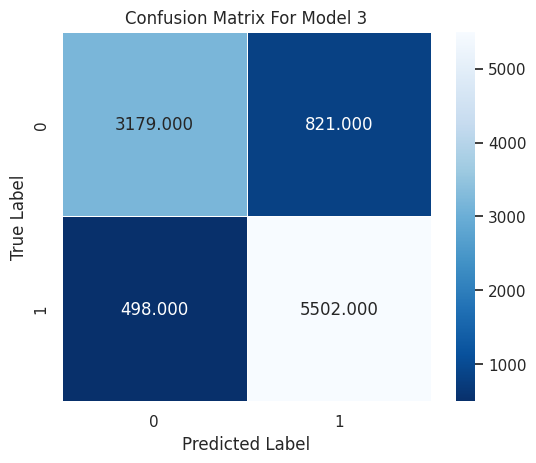

In [106]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_3,y_hat_temp_3)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_3,y_hat_temp_3))
print('Recall score: ',metrics.recall_score(y_test_temp_3,y_hat_temp_3))
print('F1 score: ',metrics.f1_score(y_test_temp_3,y_hat_temp_3))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")
cm_3 = confusion_matrix(y_test_temp_3,y_hat_temp_3)
sns.heatmap(cm_3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_3[0,0])
print("\tTrue Negatives:",cm_3[0,1])
print("\tFalse Positives:",cm_3[1,1])
print("\tFalse Negatives:",cm_3[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 3")
plt.show()
# print("\tConfusion Matrix: \n")

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 92.08%
Precision:  0.9129400570884871
Recall score:  0.9595
F1 score:  0.9356411506582155
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3451
	True Negatives: 549
	False Positives: 5757
	False Negatives: 243



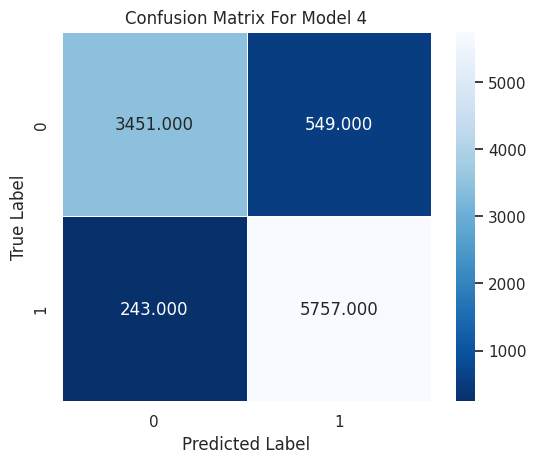

In [107]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_4,y_hat_temp_4)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_4,y_hat_temp_4))
print('Recall score: ',metrics.recall_score(y_test_temp_4,y_hat_temp_4))
print('F1 score: ',metrics.f1_score(y_test_temp_4,y_hat_temp_4))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")
cm_4 = confusion_matrix(y_test_temp_4,y_hat_temp_4)
sns.heatmap(cm_4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_4[0,0])
print("\tTrue Negatives:",cm_4[0,1])
print("\tFalse Positives:",cm_4[1,1])
print("\tFalse Negatives:",cm_4[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 4")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 85.94000000000001%
Precision:  0.9819555182543013
Recall score:  0.78
F1 score:  0.8694036782463311
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3914
	True Negatives: 86
	False Positives: 4680
	False Negatives: 1320



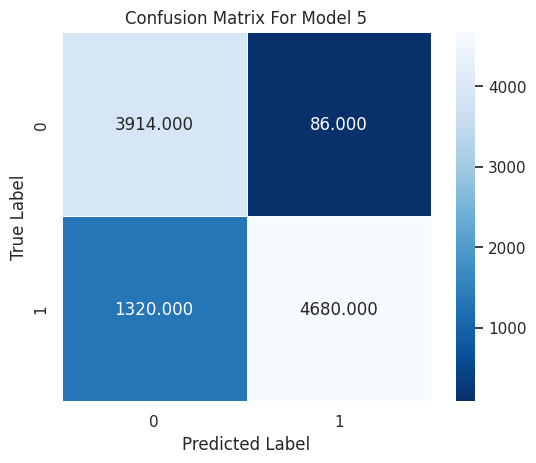

In [108]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_5,y_hat_temp_5)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_5,y_hat_temp_5))
print('Recall score: ',metrics.recall_score(y_test_temp_5,y_hat_temp_5))
print('F1 score: ',metrics.f1_score(y_test_temp_5,y_hat_temp_5))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")
cm_5 = confusion_matrix(y_test_temp_5,y_hat_temp_5)
sns.heatmap(cm_5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_5[0,0])
print("\tTrue Negatives:",cm_5[0,1])
print("\tFalse Positives:",cm_5[1,1])
print("\tFalse Negatives:",cm_5[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 5")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 90.21000000000001%
Precision:  0.9123008704220726
Recall score:  0.9258333333333333
F1 score:  0.91901728844404
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3466
	True Negatives: 534
	False Positives: 5555
	False Negatives: 445



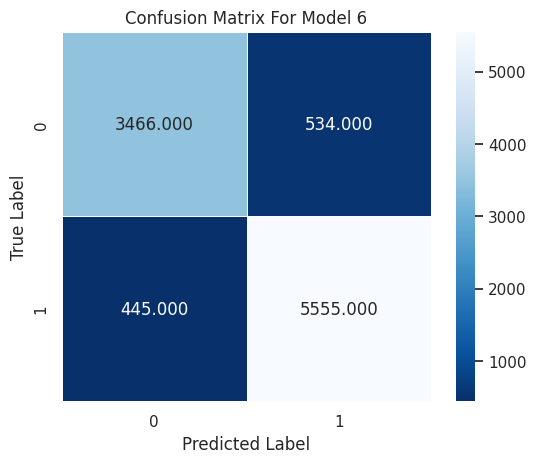

In [109]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_6,y_hat_temp_6)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_6,y_hat_temp_6))
print('Recall score: ',metrics.recall_score(y_test_temp_6,y_hat_temp_6))
print('F1 score: ',metrics.f1_score(y_test_temp_6,y_hat_temp_6))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")
sns.set()
cm_6 = confusion_matrix(y_test_temp_6,y_hat_temp_6)
sns.heatmap(cm_6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_6[0,0])
print("\tTrue Negatives:",cm_6[0,1])
print("\tFalse Positives:",cm_6[1,1])
print("\tFalse Negatives:",cm_6[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 6")
plt.show()

In [31]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 128)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 64)         

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 128)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 5, 5, 64)         

In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 128)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 5, 5, 64)         

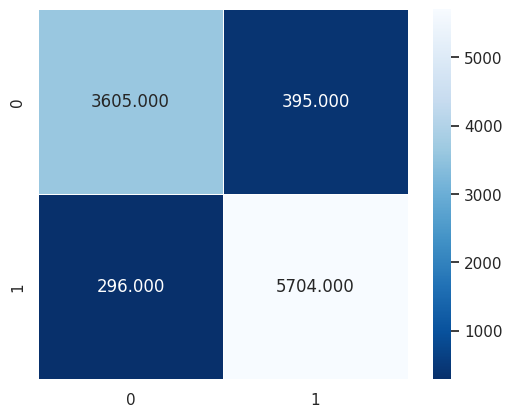

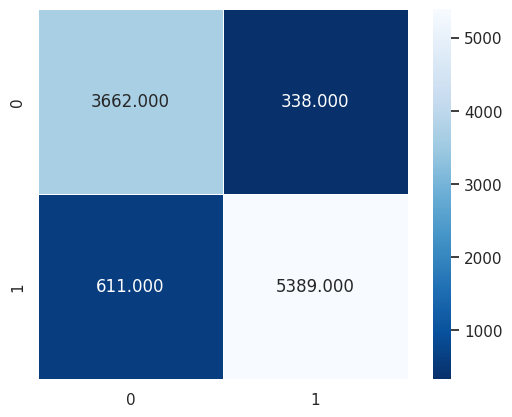

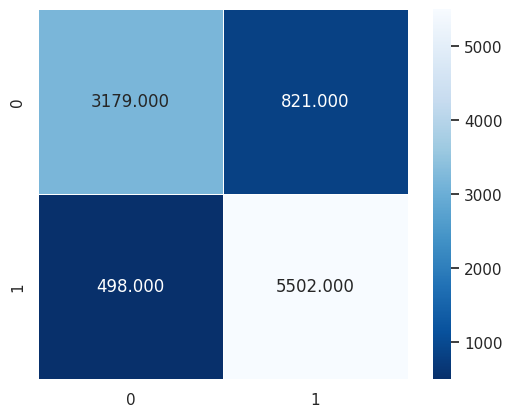

In [34]:
import seaborn as sns

sns.heatmap(cm_1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.show()

sns.heatmap(cm_2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.show()

sns.heatmap(cm_3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.show()


In [ ]:
# np.argmax(model_1.predict(tf.constant([X_test[a]])))

In [ ]:
# np.argmax(y_test[a])

In [ ]:
# plt.imshow(X_test[a])

In [ ]:
# model.save('cifar10_cnn(78t, 74v).h5')


In [ ]:
# model.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=50, validation_split = .2)

# Complex Neural Network Architecture

# the best one

In [22]:
# model.evaluate(X_test,y_test) # model save krna hai
def build_m3(learning_rate=.001):
    model = models.Sequential()

    # 1st block
    model.add(layers.Conv2D(32, (3,3), padding='same',
    input_shape=input_shape, activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(32, (3,3), padding='same',
      activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Dropout(0.2))

    # 2nd block

    model.add(layers.Conv2D(64, (3,3), padding='same',
    activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3,3), padding='same',
    activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Dropout(0.3))

    # 3d block
    model.add(layers.Conv2D(128, (3,3), padding='same',
    activation='relu'))


    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(128, (3,3), padding='same',
    activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Dropout(0.4))

    # dense
    model.add(layers.Flatten())
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [23]:
model_3_cnn_a = build_m3()
model_3_cnn_b = build_m3(learning_rate=.0001)
model_3_cnn_c = build_m3(learning_rate=.00001)
hist_cnn_3a = model_3_cnn_a.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)
hist_cnn_3b = model_3_cnn_b.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)
hist_cnn_3c = model_3_cnn_c.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)

Epoch 1/10
313/313 [==============================] - 13s 25ms/step - loss: 0.3004 - accuracy: 0.8957 - val_loss: 0.5133 - val_accuracy: 0.7624
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 0.2020 - accuracy: 0.9246 - val_loss: 0.2011 - val_accuracy: 0.9219
Epoch 3/10
313/313 [==============================] - 7s 22ms/step - loss: 0.1686 - accuracy: 0.9365 - val_loss: 0.1514 - val_accuracy: 0.9432
Epoch 4/10
313/313 [==============================] - 7s 22ms/step - loss: 0.1441 - accuracy: 0.9446 - val_loss: 0.1982 - val_accuracy: 0.9318
Epoch 5/10
313/313 [==============================] - 7s 22ms/step - loss: 0.1317 - accuracy: 0.9494 - val_loss: 0.1386 - val_accuracy: 0.9458
Epoch 6/10
313/313 [==============================] - 7s 22ms/step - loss: 0.1201 - accuracy: 0.9536 - val_loss: 0.1760 - val_accuracy: 0.9365
Epoch 7/10
313/313 [==============================] - 7s 22ms/step - loss: 0.1133 - accuracy: 0.9556 - val_loss: 0.1172 - val_accuracy: 0.955

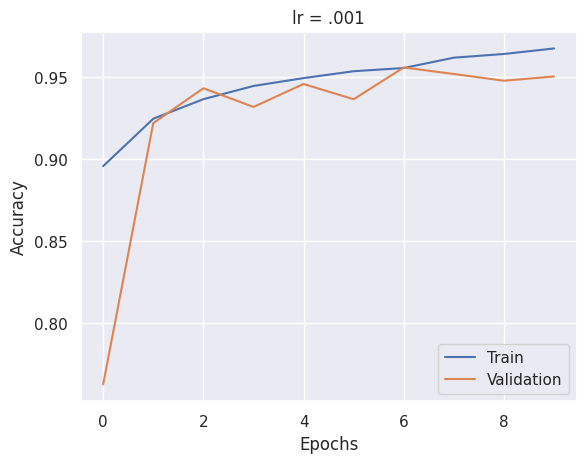

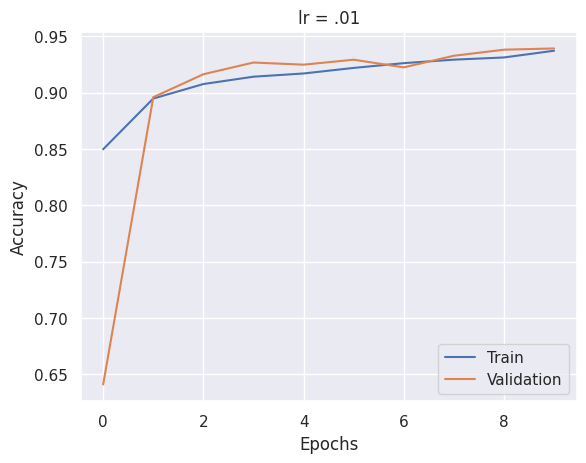

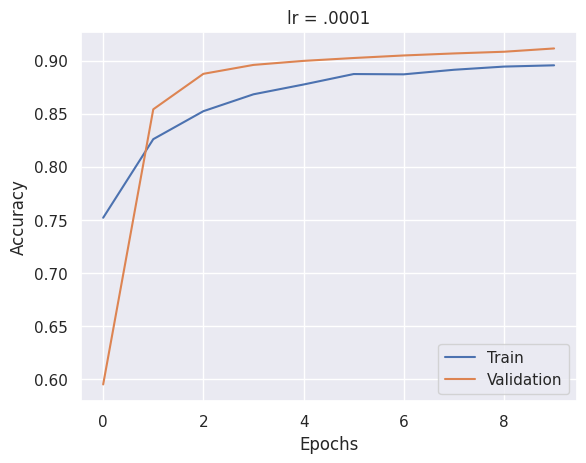

In [24]:
import seaborn as sns
sns.set()
plt.plot(hist_cnn_3a.history['accuracy'])
plt.plot(hist_cnn_3a.history['val_accuracy'])
plt.title("lr = .001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_cnn_3b.history['accuracy'])
plt.plot(hist_cnn_3b.history['val_accuracy'])
plt.title("lr = .01")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_cnn_3c.history['accuracy'])
plt.plot(hist_cnn_3c.history['val_accuracy'])
plt.title("lr = .0001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

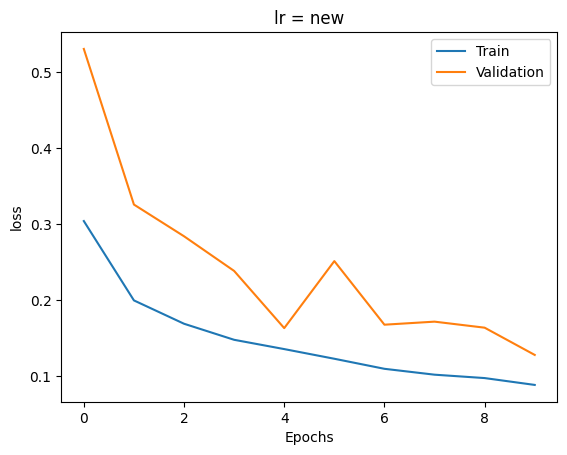

In [ ]:
plt.plot(hist_cnn_3a.history['loss'])
plt.plot(hist_cnn_3a.history['val_loss'])
plt.title("lr = new")
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

In [ ]:
print(model_3_cnn_a.evaluate(X_test,y_test))
print(model_3_cnn_b.evaluate(X_test,y_test))
print(model_3_cnn_c.evaluate(X_test,y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.1372 - accuracy: 0.9493
[0.13724112510681152, 0.9492999911308289]
313/313 [==============================] - 1s 4ms/step - loss: 0.1630 - accuracy: 0.9336
[0.1629609316587448, 0.9336000084877014]
313/313 [==============================] - 2s 5ms/step - loss: 0.2603 - accuracy: 0.9005
[0.26030364632606506, 0.9004999995231628]


In [ ]:
y_hat_cnn_1 = model_3_cnn_a.predict(X_test)
y_hat_cnn_2 = model_3_cnn_b.predict(X_test)
y_hat_cnn_3 = model_3_cnn_c.predict(X_test)

y_test_temp = np.argmax(y_test, axis=1)
y_hat_temp_1 = np.argmax(y_hat_cnn_1, axis=1)
cm_7 = confusion_matrix(y_test_temp,y_hat_temp_1)


print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_7[0,0])
print("\tTrue Negatives:",cm_7[0,1])
print("\tFalse Positives:",cm_7[1,1])
print("\tFalse Negatives:",cm_7[1,0])

313/313 [==============================] - 1s 2ms/step
	Confusion Matrix: 

	True Positives: 3760
	True Negatives: 240
	False Positives: 5733
	False Negatives: 267


In [ ]:
y_hat_temp_2 = np.argmax(y_hat_cnn_2, axis=1)
cm_8 = confusion_matrix(y_test_temp,y_hat_temp_2)


print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_8[0,0])
print("\tTrue Negatives:",cm_8[0,1])
print("\tFalse Positives:",cm_8[1,1])
print("\tFalse Negatives:",cm_8[1,0])

	Confusion Matrix: 

	True Positives: 3663
	True Negatives: 337
	False Positives: 5673
	False Negatives: 327


In [ ]:
y_hat_temp_3 = np.argmax(y_hat_cnn_3, axis=1)
cm_9 = confusion_matrix(y_test_temp,y_hat_temp_3)


print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_9[0,0])
print("\tTrue Negatives:",cm_9[0,1])
print("\tFalse Positives:",cm_9[1,1])
print("\tFalse Negatives:",cm_9[1,0])

	Confusion Matrix: 

	True Positives: 3624
	True Negatives: 376
	False Positives: 5381
	False Negatives: 619


In [ ]:


# modela = models.Sequential()
# modela.add(layers.Conv2D(128, (6,6), input_shape=(32,32,3), activation='relu'))

# # modela.add(layers.BatchNormalization())

# modela.add(layers.Conv2D(128, (5,5), activation='relu'))

# modela.add(layers.MaxPooling2D(pool_size=(2,2)))
# modela.add(layers.Dropout(0.2))

# modela.add(layers.Conv2D(64, (4,4), activation='relu'))

# modela.add(layers.BatchNormalization())

# modela.add(layers.Conv2D(64, (3,3), activation='relu'))

# modela.add(layers.MaxPooling2D(pool_size=(2,2)))
# modela.add(layers.Dropout(0.3))

# modela.add(layers.Conv2D(32, (2,2), activation='relu'))

# modela.add(layers.BatchNormalization())

# modela.add(layers.Conv2D(32, (1,1), activation='relu'))

# modela.add(layers.MaxPooling2D(pool_size=(2,2)))
# modela.add(layers.Dropout(0.4))


# modela.add(layers.Flatten())
# modela.add(layers.Dense(512,activation='relu'))
# modela.add(layers.Dense(2,activation='softmax'))


In [ ]:
# modela.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# history = modela.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.ylabel('Accuracy')
# plt.xlabel('Epochs')
# plt.legend(['Train', 'Validation'])

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.ylabel('Loss-Function')
# plt.xlabel('Epochs')
# plt.legend(['Train', 'Validation'])

In [ ]:
# metrics=modela.evaluate(X_test,y_test)

# print("Accuracy: ", metrics[1])
# print("Loss: ", metrics[0])

# y_hat=modela.predict(X_test)

In [ ]:
# from sklearn.metrics import confusion_matrix
# y_test_temp = np.argmax(y_test, axis=1)
# y_hat_temp = np.argmax(y_hat, axis=1)
# cm = confusion_matrix(y_test_temp,y_hat_temp)

# print("\tConfusion Matrix: \n")
# print("\tTrue Positives:",cm[0,0])
# print("\tTrue Negatives:",cm[0,1])
# print("\tFalse Positives:",cm[1,1])
# print("\tFalse Negatives:",cm[1,0])

# # y_test_t

In [ ]:
# modela.summary()

In [ ]:
model_3_cnn_a.save('cnn_95.h5')

In [ ]:
# saving md=odel to json # same as prev
model_json = model_3_cnn_a.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_3_cnn_a.save_weights("model_new.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
"""
# load json and create model
json_file = open('model_new.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_new.h5")
print("Loaded model from disk")"""

# Non Parametric -- KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_1 = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
knn_2 = KNeighborsClassifier(n_neighbors=9,algorithm='auto')
knn_3 = KNeighborsClassifier(n_neighbors=13,algorithm='auto')

In [37]:
32*32*3

3072

In [38]:
X_train_reshaped_for_shallow= X_train.reshape(X_train.shape[0],3072)
X_test_reshaped_for_shallow = X_test.reshape(X_test.shape[0],3072) # since knn needs 2 dims.. we change the dimensions to (50000, 32x32x3=)

In [39]:
y_train_reshaped_for_knn = np.argmax(y_train, axis=1)
y_test_reshaped_for_knn = np.argmax(y_test, axis=1)


In [40]:
knn_1.fit(X_train_reshaped_for_shallow, y_train_reshaped_for_knn)
knn_2.fit(X_train_reshaped_for_shallow, y_train_reshaped_for_knn)
knn_3.fit(X_train_reshaped_for_shallow, y_train_reshaped_for_knn)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_hat_knn_1=knn_1.predict(X_test_reshaped_for_shallow)
y_hat_knn_2=knn_2.predict(X_test_reshaped_for_shallow)
y_hat_knn_3=knn_3.predict(X_test_reshaped_for_shallow)

In [56]:
import tensorflow as tf
import cv2
import numpy as np

(3072,)

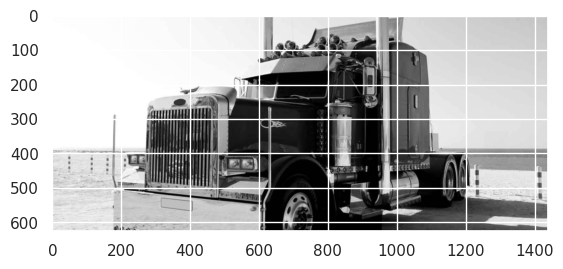

In [76]:
img = cv2.imread('6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')  # Display the grayscale image

# Reshape the image to have 3 dimensions
img = np.expand_dims(img, axis=-1)
img = tf.image.resize(img, (3072, 1))

img = img / 255.0

# Remove the last dimension
img = np.squeeze(img)

img.shape

In [77]:
knn_1.predict([img])

array([1])

In [46]:
X_test_reshaped_for_shallow[0].shape

(3072,)

In [44]:
knn_1.predict([X_test_reshaped_for_shallow[0]])
y_test_reshaped_for_knn[0]

1

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_hat_temp_1 = np.argmax(y_hat_cnn_1, axis=1)
cm_7 = confusion_matrix(y_test_temp,y_hat_temp_1)


print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_7[0,0])
print("\tTrue Negatives:",cm_7[0,1])
print("\tFalse Positives:",cm_7[1,1])
print("\tFalse Negatives:",cm_7[1,0])

	Confusion Matrix: 

	True Positives: 3760
	True Negatives: 240
	False Positives: 5733
	False Negatives: 267


In [ ]:
accuracy_score(y_test_reshaped_for_knn, y_hat_knn_1)

0.8079

In [ ]:
accuracy_score(y_test_reshaped_for_knn, y_hat_knn_2)

0.807

In [ ]:
accuracy_score(y_test_reshaped_for_knn, y_hat_knn_3)

0.8022

In [ ]:
X_test[0].shape

(32, 32, 3)

In [ ]:
X_test_reshaped_for_shallow[0].shape

(3072,)

In [ ]:
z = X_test[284].reshape(3072,)
z

array([1.        , 1.        , 1.        , ..., 0.44705882, 0.42745098,
       0.41960784])

In [ ]:
print(knn_1.predict(X_test_reshaped_for_shallow))
print(knn_2.predict(X_test_reshaped_for_shallow))
print(knn_3.predict(X_test_reshaped_for_shallow))

[1 0 0 ... 1 1 1]
[1 0 0 ... 1 1 1]
[1 0 0 ... 1 1 1]


In [ ]:
y_test_reshaped_for_knn[284]

0

<Axes: >

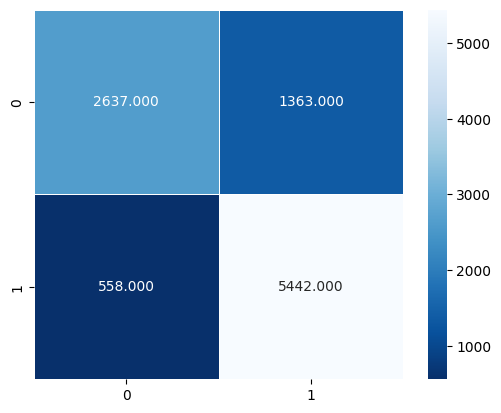

In [ ]:
# y_hat_temp_1 = np.argmax(y_hat_knn_1, axis=1)
cm_10 = confusion_matrix(y_test_reshaped_for_knn,y_hat_knn_1)

sns.heatmap(cm_10, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# print("\tConfusion Matrix: \n")
# print("\tTrue Positives:",cm_7[0,0])
# print("\tTrue Negatives:",cm_7[0,1])
# print("\tFalse Positives:",cm_7[1,1])
# print("\tFalse Negatives:",cm_7[1,0])

<Axes: >

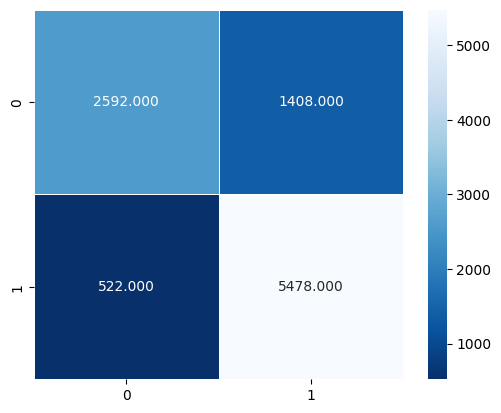

In [ ]:
cm_11 = confusion_matrix(y_test_reshaped_for_knn,y_hat_knn_2)

sns.heatmap(cm_11, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

<Axes: >

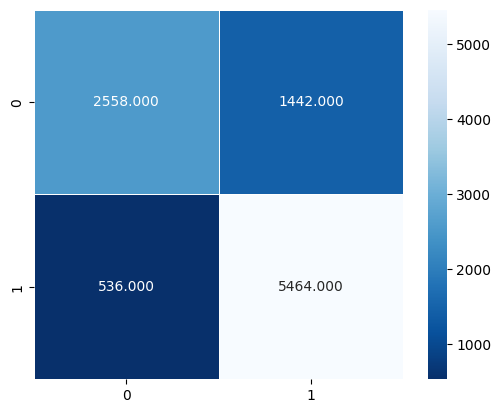

In [ ]:
cm_12 = confusion_matrix(y_test_reshaped_for_knn,y_hat_knn_3)

sns.heatmap(cm_12, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_m1 = LogisticRegression(max_iter=1000)
lr_m2 = LogisticRegression(max_iter=500)
lr_m3 = LogisticRegression(max_iter=10000)

In [ ]:
lr_m1.fit(X_train_reshaped_for_shallow, y_train_reshaped_for_knn
          )

lr_m2.fit(X_train_reshaped_for_shallow, y_train_reshaped_for_knn
          )

lr_m3.fit(X_train_reshaped_for_shallow, y_train_reshaped_for_knn
          )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(max_iter=10000)

In [ ]:
y_hat_lr_m1 = lr_m1.predict(X_test_reshaped_for_shallow)
y_hat_lr_m2 = lr_m2.predict(X_test_reshaped_for_shallow)
y_hat_lr_m3 = lr_m3.predict(X_test_reshaped_for_shallow)

<Axes: >

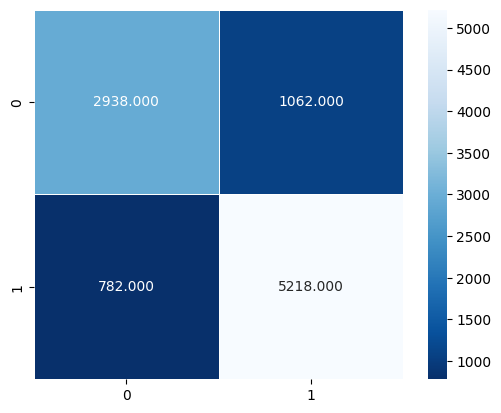

In [ ]:
cm_13=confusion_matrix(y_test_reshaped_for_knn,y_hat_lr_m1 )
sns.heatmap(cm_13, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

<Axes: >

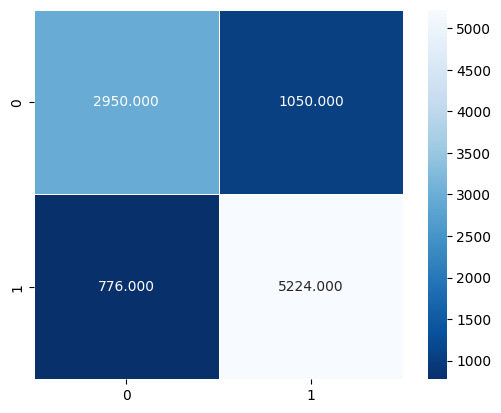

In [ ]:
cm_14=confusion_matrix(y_test_reshaped_for_knn,y_hat_lr_m2 )
sns.heatmap(cm_14, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

<Axes: >

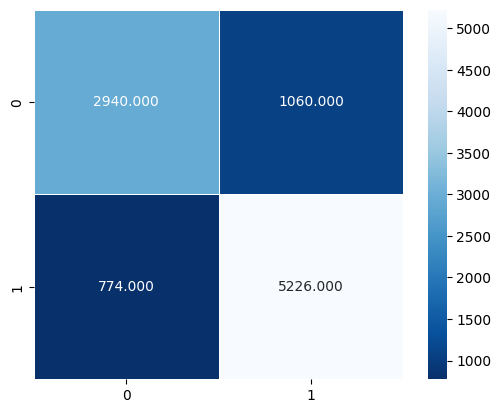

In [ ]:
cm_15 = confusion_matrix(y_test_reshaped_for_knn,y_hat_lr_m3 )
sns.heatmap(cm_15, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

In [ ]:
print(lr_m1.coef_)
print(lr_m2.coef_)
print(lr_m3.coef_)

[[-0.21293959  0.53539295 -1.46313228 ...  0.1999252   0.9398969
  -0.59426062]]
[[-0.21315459  0.17814224 -1.13366686 ...  0.30080217  0.65509022
  -0.56033929]]
[[-0.19338072  0.67655832 -1.60369663 ...  0.1079959   1.03135918
  -0.65103354]]


In [ ]:
print(lr_m1.intercept_)
print(lr_m2.intercept_)
print(lr_m3.intercept_)

[1.75849393]
[1.72991949]
[1.76000595]
